## Data Understanding



In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
plt.style.use('seaborn')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the Dataset as a dataframe
df = pd.read_csv('../data/kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# Reading the column names and descriptions
with open('../data/column_names.md', 'r') as file:
    column_descriptions = file.read()

print(column_descriptions)

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the neares

## Column Names and descriptions for Kings County Data Set

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [5]:
df.shape

(21597, 21)

#### There are 21597 rows and 21 columns in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.describe().transpose()


count          mean           std           min  \
id             21597.0  4.580474e+09  2.876736e+09  1.000102e+06   
price          21597.0  5.402966e+05  3.673681e+05  7.800000e+04   
bedrooms       21597.0  3.373200e+00  9.262989e-01  1.000000e+00   
bathrooms      21597.0  2.115826e+00  7.689843e-01  5.000000e-01   
sqft_living    21597.0  2.080322e+03  9.181061e+02  3.700000e+02   
sqft_lot       21597.0  1.509941e+04  4.141264e+04  5.200000e+02   
floors         21597.0  1.494096e+00  5.396828e-01  1.000000e+00   
waterfront     19221.0  7.595859e-03  8.682485e-02  0.000000e+00   
view           21534.0  2.338627e-01  7.656862e-01  0.000000e+00   
condition      21597.0  3.409825e+00  6.505456e-01  1.000000e+00   
grade          21597.0  7.657915e+00  1.173200e+00  3.000000e+00   
sqft_above     21597.0  1.788597e+03  8.277598e+02  3.700000e+02   
yr_built       21597.0  1.971000e+03  2.937523e+01  1.900000e+03   
yr_renovated   17755.0  8.363678e+01  3.999464e+02  0.000000e+00   
zipcode        21597.0  9.807795e+04  5.351307e+01  9.800100e+04   
lat            21597.0  4.756009e+01  1.385518e-01  4.715590e+01   
long           21597.0 -1.222140e+02  1.407235e-01 -1.225190e+02   
sqft_living15  21597.0  1.986620e+03  6.852305e+02  3.990000e+02   
sqft_lot15     21597.0  1.275828e+04  2.727444e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.220000e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068500e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747110e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222310e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

#### Checking for any missing values in our data

In [8]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There are three columns with missing values namely waterfront, view and yr renovated that have null values. Waterfont and view have categorical data and therefore will use mode to fill the missing values while mean is used for the yr renovated 

In [9]:
# fill the missing values 
df = df.fillna(df['yr_renovated'].mean())
df = df.fillna(df['waterfront'].mode())
df = df.fillna(df['view'].mode())
# check for missing values once more
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
#Check if there are any duplicates in the dataset
df.duplicated().sum()

0

#### There are no duplicates in the dataset

In [11]:
#Drop all columns that are unnecessary for the project from my domain knowledge

df = df.drop(['id', 'sqft_basement','sqft_living15', 'sqft_lot15'], axis  = 1)
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

### Change the date format 

In [12]:
#Split month and year in the date column into two different columns.
month_sold = []
year_sold = []
for date in df.date:
    month_sold.append(int(date.split('/')[0]))
    year_sold.append(int (date.split('/')[2]))
df['month_sold'] = (month_sold)
df['year_sold'] = (year_sold)
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  yr_built  yr_renovated  \
0   83.636778   0.0          3      7        1180      1955      0.000000   
1    0.000000   0.0          3      7        2170      1951   1991.000000   
2    0.000000   0.0          3      6         770      1933     83.636778   
3    0.000000   0.0          5      7        1050      1965      0.000000   
4    0.000000   0.0          3      8        1680      1987      0.000000   

   zipcode      lat     long  month_sold  year_sold  
0    98178  47.5112 -122.257          10       2014  
1    98125  47.7210 -122.319          12       2014  
2    98028  47.7379 -122.233           2       2015  
3    98136  47.5208 -122.393          12       2014  
4    98074  47.6168 -122.045           2       2015

In [13]:
#Drop the old date column
df.drop('date', inplace = True, axis = 1)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0   83.636778   
1  538000.0         3       2.25         2570      7242     2.0    0.000000   
2  180000.0         2       1.00          770     10000     1.0    0.000000   
3  604000.0         4       3.00         1960      5000     1.0    0.000000   
4  510000.0         3       2.00         1680      8080     1.0    0.000000   

   view  condition  grade  sqft_above  yr_built  yr_renovated  zipcode  \
0   0.0          3      7        1180      1955      0.000000    98178   
1   0.0          3      7        2170      1951   1991.000000    98125   
2   0.0          3      6         770      1933     83.636778    98028   
3   0.0          5      7        1050      1965      0.000000    98136   
4   0.0          3      8        1680      1987      0.000000    98074   

       lat     long  month_sold  year_sold  
0  47.5112 -122.257          10       2014  
1  47.7210 -122.319          12       2014  
2  47.7379 -122.233           2       2015  
3  47.5208 -122.393          12       2014  
4  47.6168 -122.045           2       2015

In [14]:
# Convert year built column with the property's age given as age_sold

df['age_sold'] = df['year_sold'] - df['yr_built']
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0   83.636778   
1  538000.0         3       2.25         2570      7242     2.0    0.000000   
2  180000.0         2       1.00          770     10000     1.0    0.000000   
3  604000.0         4       3.00         1960      5000     1.0    0.000000   
4  510000.0         3       2.00         1680      8080     1.0    0.000000   

   view  condition  grade  sqft_above  yr_built  yr_renovated  zipcode  \
0   0.0          3      7        1180      1955      0.000000    98178   
1   0.0          3      7        2170      1951   1991.000000    98125   
2   0.0          3      6         770      1933     83.636778    98028   
3   0.0          5      7        1050      1965      0.000000    98136   
4   0.0          3      8        1680      1987      0.000000    98074   

       lat     long  month_sold  year_sold  age_sold  
0  47.5112 -122.257          10       2014        59  
1  47.7210 -122.319          12       2014        63  
2  47.7379 -122.233           2       2015        82  
3  47.5208 -122.393          12       2014        49  
4  47.6168 -122.045           2       2015        28

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21597 non-null  float64
 1   bedrooms      21597 non-null  int64  
 2   bathrooms     21597 non-null  float64
 3   sqft_living   21597 non-null  int64  
 4   sqft_lot      21597 non-null  int64  
 5   floors        21597 non-null  float64
 6   waterfront    21597 non-null  float64
 7   view          21597 non-null  float64
 8   condition     21597 non-null  int64  
 9   grade         21597 non-null  int64  
 10  sqft_above    21597 non-null  int64  
 11  yr_built      21597 non-null  int64  
 12  yr_renovated  21597 non-null  float64
 13  zipcode       21597 non-null  int64  
 14  lat           21597 non-null  float64
 15  long          21597 non-null  float64
 16  month_sold    21597 non-null  int64  
 17  year_sold     21597 non-null  int64  
 18  age_sold      21597 non-nu

## Data Analysis

In [16]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Convert the correlation matrix to a readable format
correlation_table = correlation_matrix.round(2)
correlation_table

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price          1.00      0.31       0.53         0.70      0.09    0.26   
bedrooms       0.31      1.00       0.51         0.58      0.03    0.18   
bathrooms      0.53      0.51       1.00         0.76      0.09    0.50   
sqft_living    0.70      0.58       0.76         1.00      0.17    0.35   
sqft_lot       0.09      0.03       0.09         0.17      1.00   -0.00   
floors         0.26      0.18       0.50         0.35     -0.00    1.00   
waterfront    -0.01     -0.00      -0.00        -0.01      0.00   -0.00   
view           0.08      0.02       0.03         0.06      0.02    0.00   
condition      0.04      0.03      -0.13        -0.06     -0.01   -0.26   
grade          0.67      0.36       0.67         0.76      0.11    0.46   
sqft_above     0.61      0.48       0.69         0.88      0.18    0.52   
yr_built       0.05      0.16       0.51         0.32      0.05    0.49   
yr_renovated   0.12      0.02       0.05         0.05      0.00    0.00   
zipcode       -0.05     -0.15      -0.20        -0.20     -0.13   -0.06   
lat            0.31     -0.01       0.02         0.05     -0.09    0.05   
long           0.02      0.13       0.22         0.24      0.23    0.13   
month_sold    -0.01     -0.00       0.01         0.01     -0.00    0.01   
year_sold      0.00     -0.01      -0.03        -0.03      0.01   -0.02   
age_sold      -0.05     -0.16      -0.51        -0.32     -0.05   -0.49   

              waterfront  view  condition  grade  sqft_above  yr_built  \
price              -0.01  0.08       0.04   0.67        0.61      0.05   
bedrooms           -0.00  0.02       0.03   0.36        0.48      0.16   
bathrooms          -0.00  0.03      -0.13   0.67        0.69      0.51   
sqft_living        -0.01  0.06      -0.06   0.76        0.88      0.32   
sqft_lot            0.00  0.02      -0.01   0.11        0.18      0.05   
floors             -0.00  0.00      -0.26   0.46        0.52      0.49   
waterfront          1.00 -0.00      -0.00  -0.01       -0.01     -0.00   
view               -0.00  1.00       0.01   0.05        0.03     -0.01   
condition          -0.00  0.01       1.00  -0.15       -0.16     -0.36   
grade              -0.01  0.05      -0.15   1.00        0.76      0.45   
sqft_above         -0.01  0.03      -0.16   0.76        1.00      0.42   
yr_built           -0.00 -0.01      -0.36   0.45        0.42      1.00   
yr_renovated        0.01  0.01      -0.06   0.02        0.02     -0.20   
zipcode             0.01  0.02       0.00  -0.19       -0.26     -0.35   
lat                 0.00 -0.01      -0.02   0.11       -0.00     -0.15   
long                0.00 -0.02      -0.11   0.20        0.34      0.41   
month_sold         -0.01 -0.01       0.02   0.01        0.01     -0.01   
year_sold           0.01  0.02      -0.05  -0.03       -0.02      0.00   
age_sold            0.00  0.01       0.36  -0.45       -0.42     -1.00   

              yr_renovated  zipcode   lat  long  month_sold  year_sold  \
price                 0.12    -0.05  0.31  0.02       -0.01       0.00   
bedrooms              0.02    -0.15 -0.01  0.13       -0.00      -0.01   
bathrooms             0.05    -0.20  0.02  0.22        0.01      -0.03   
sqft_living           0.05    -0.20  0.05  0.24        0.01      -0.03   
sqft_lot              0.00    -0.13 -0.09  0.23       -0.00       0.01   
floors                0.00    -0.06  0.05  0.13        0.01      -0.02   
waterfront            0.01     0.01  0.00  0.00       -0.01       0.01   
view                  0.01     0.02 -0.01 -0.02       -0.01       0.02   
condition            -0.06     0.00 -0.02 -0.11        0.02      -0.05   
grade                 0.02    -0.19  0.11  0.20        0.01      -0.03   
sqft_above            0.02    -0.26 -0.00  0.34        0.01      -0.02   
yr_built             -0.20    -0.35 -0.15  0.41       -0.01       0.00   
yr_renovated          1.00     0.06  0.03 -0.07        0.01      -0.02

### Pair plot

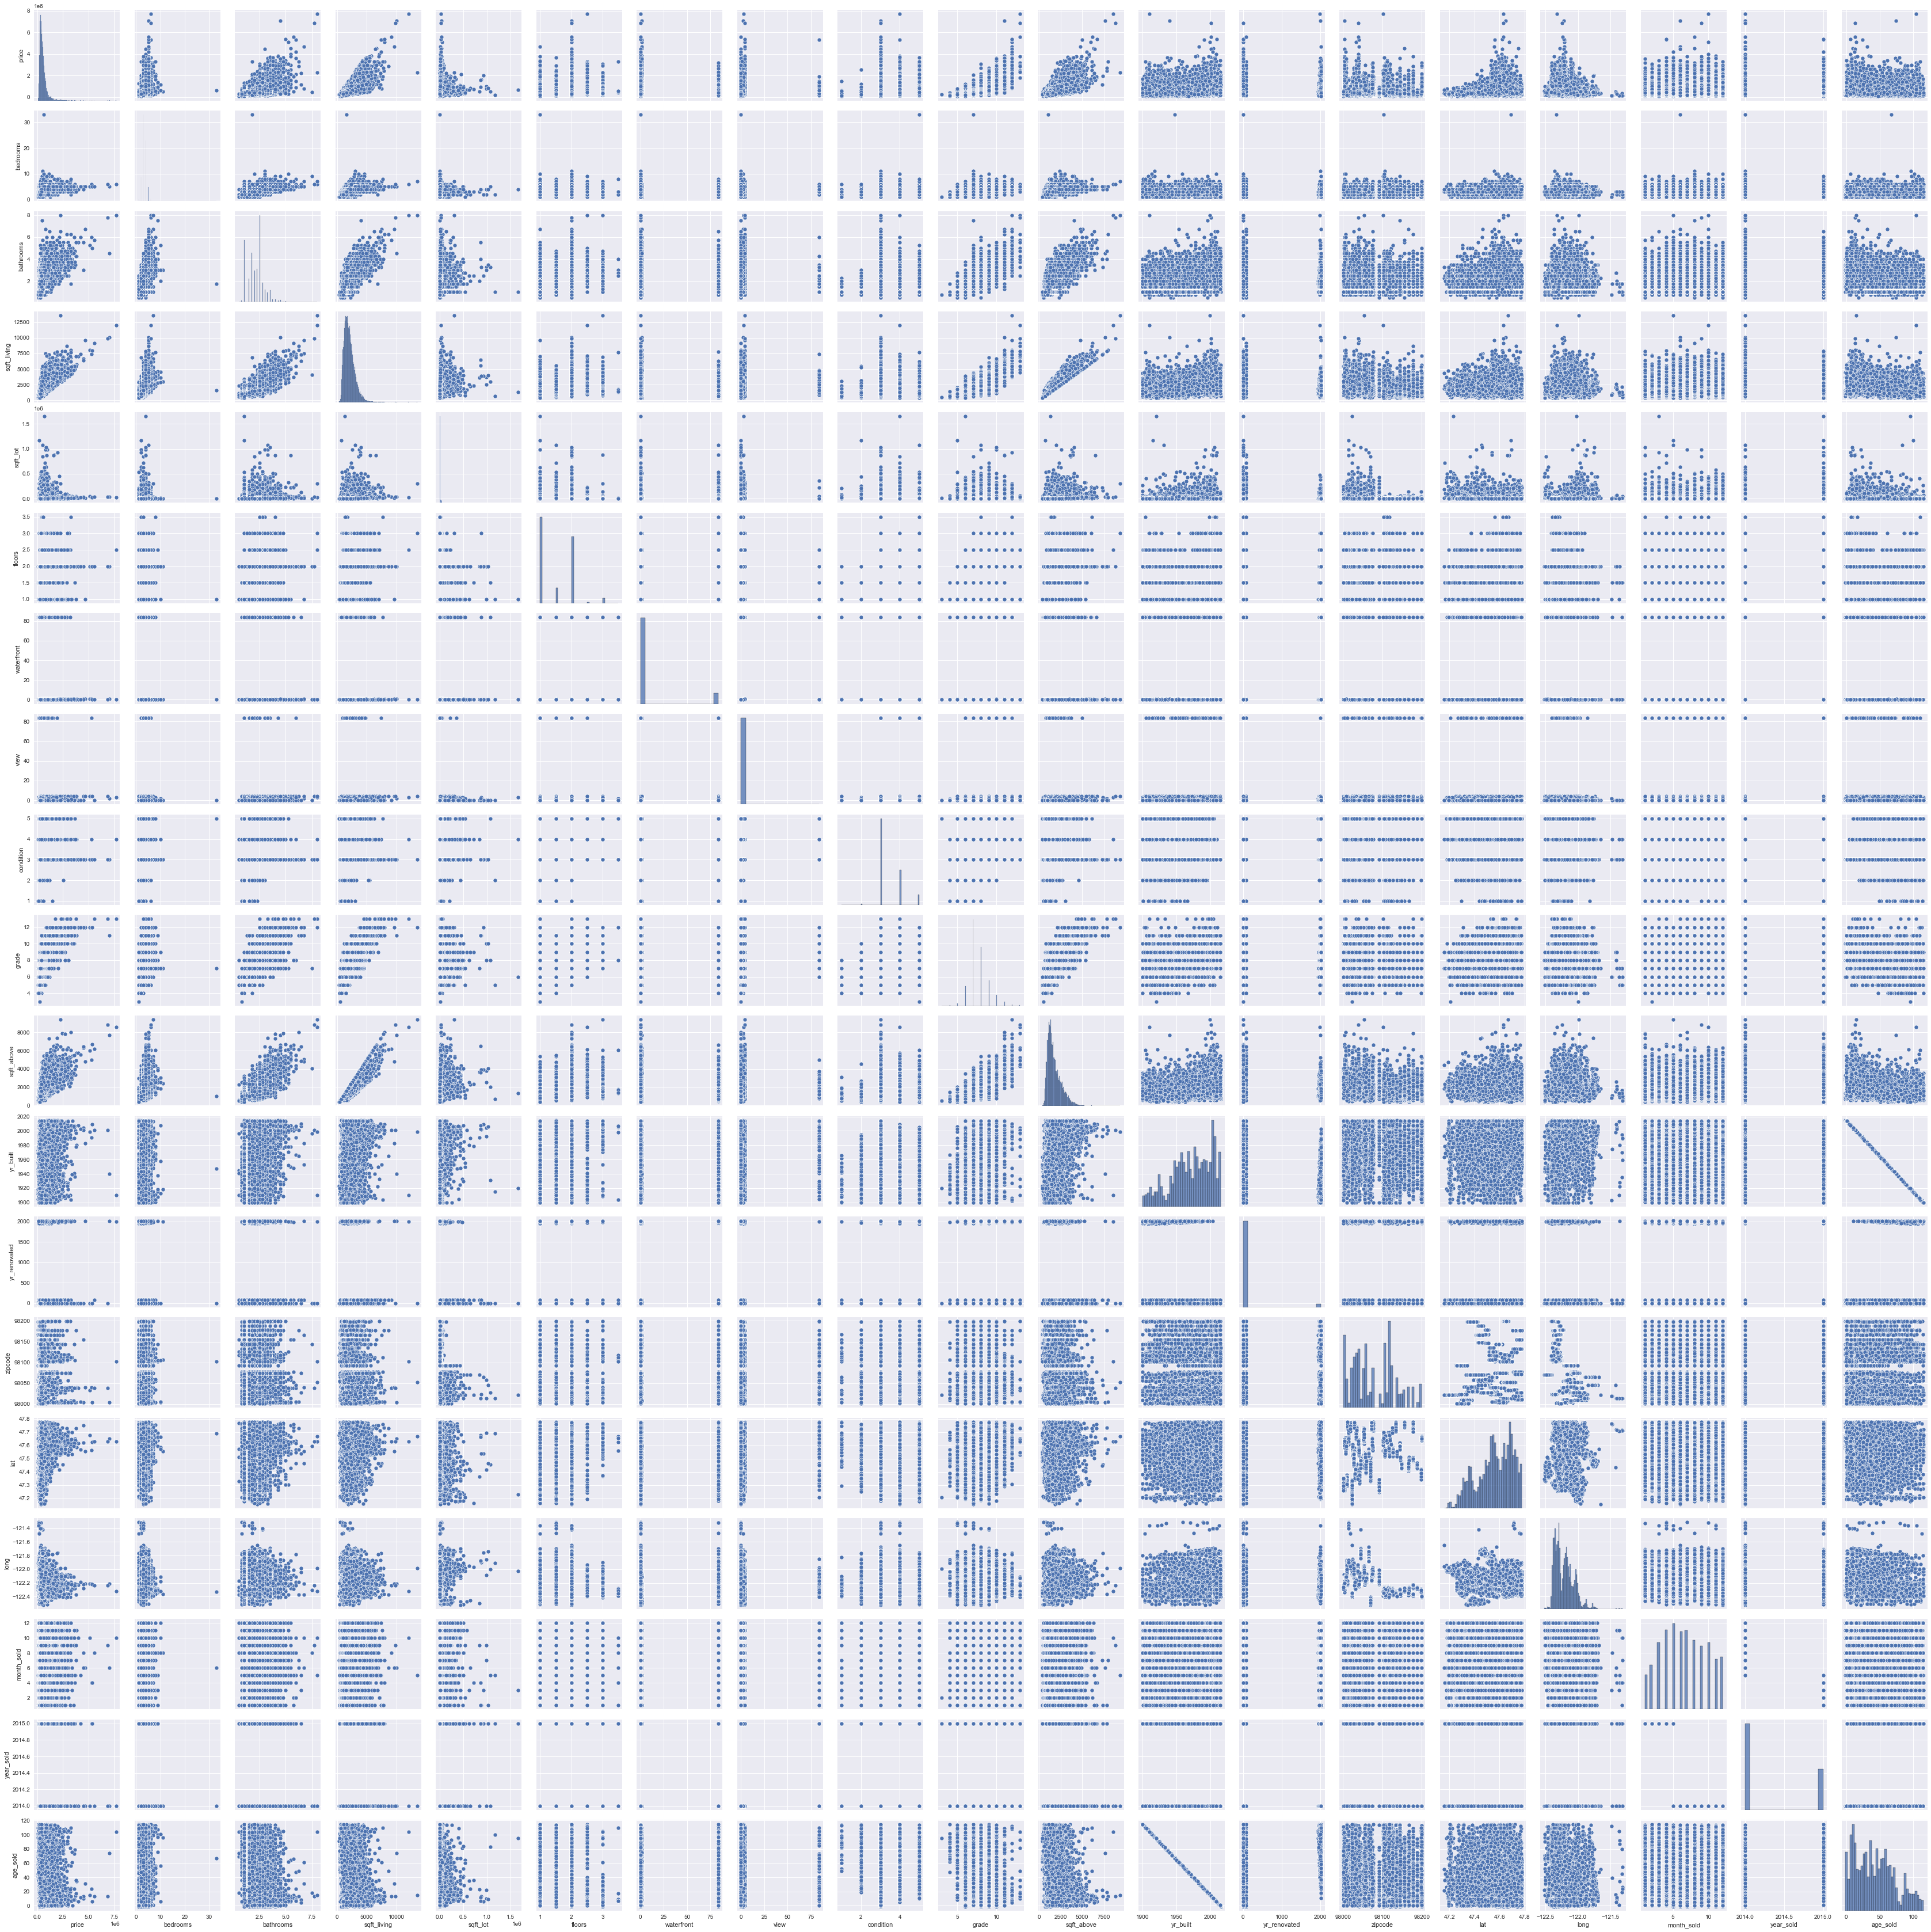

In [17]:
sns.pairplot(data=df)

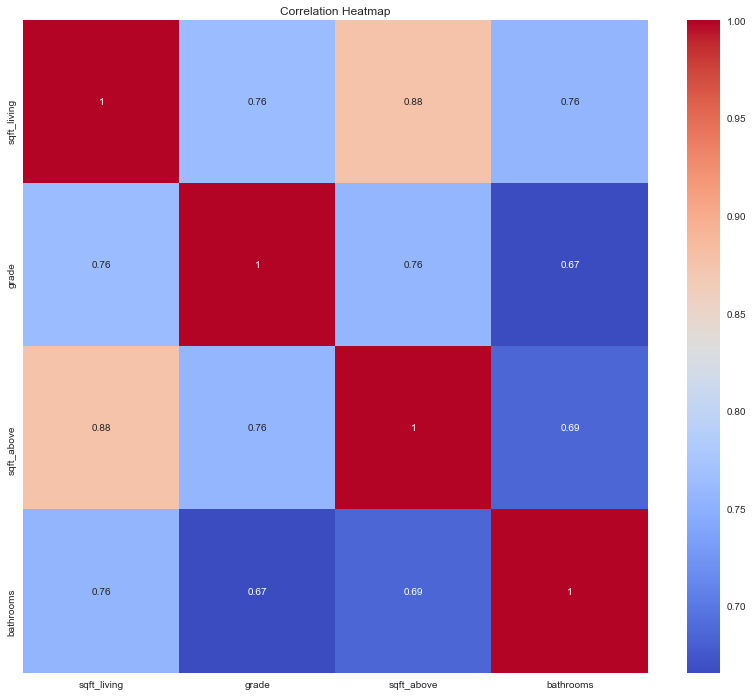

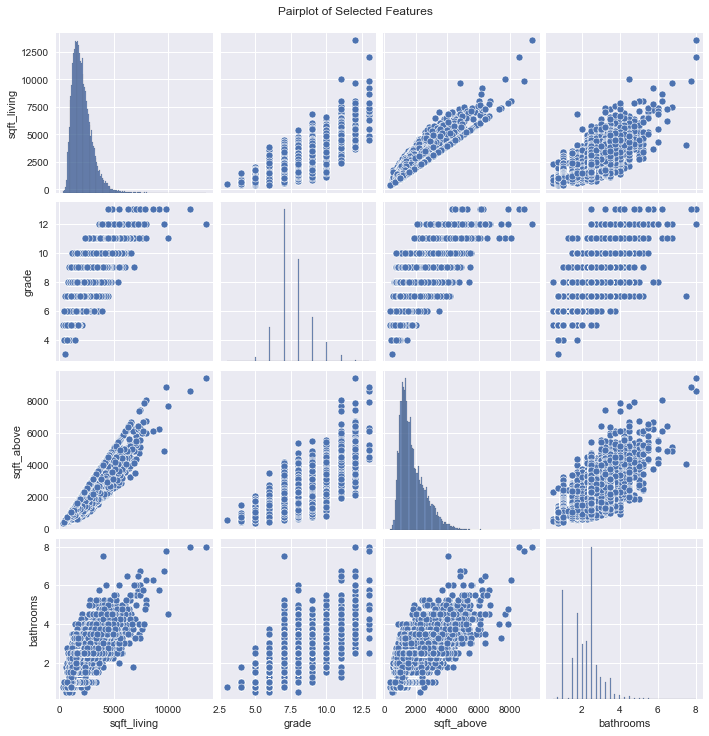

In [18]:
# Select a subset of features for pairplot to avoid clutter
selected_features = ['price', 'sqft_living', 'grade', 'sqft_above', 'bathrooms']
X = ['sqft_living', 'grade', 'sqft_above', 'bathrooms']
Y = ['price']

# Correlation heatmap
plt.figure(figsize=(14, 12))
corr_matrix = df[X].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df[X])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

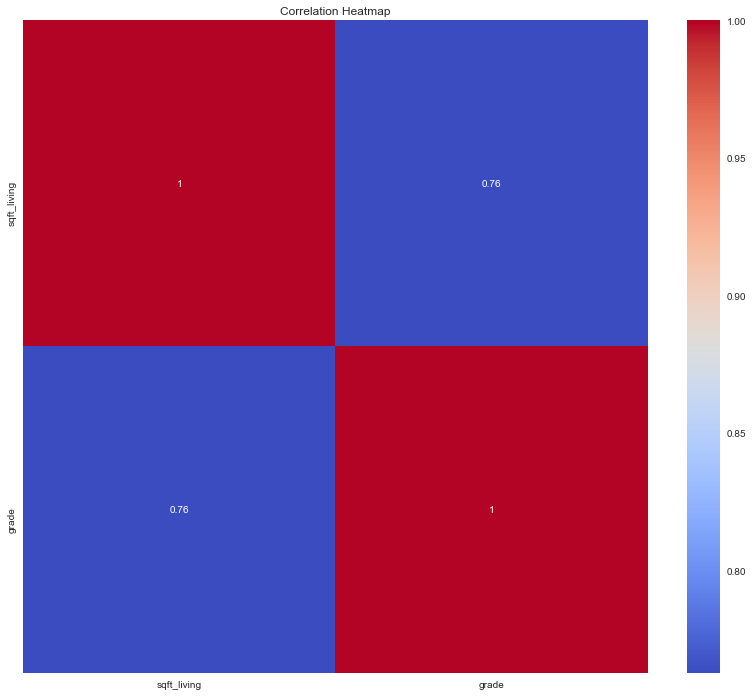

In [19]:
X_2 = ['sqft_living', 'grade']
Y_2 = ['price']

# Correlation heatmap
plt.figure(figsize=(14, 12))
corr_matrix = df[X_2].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

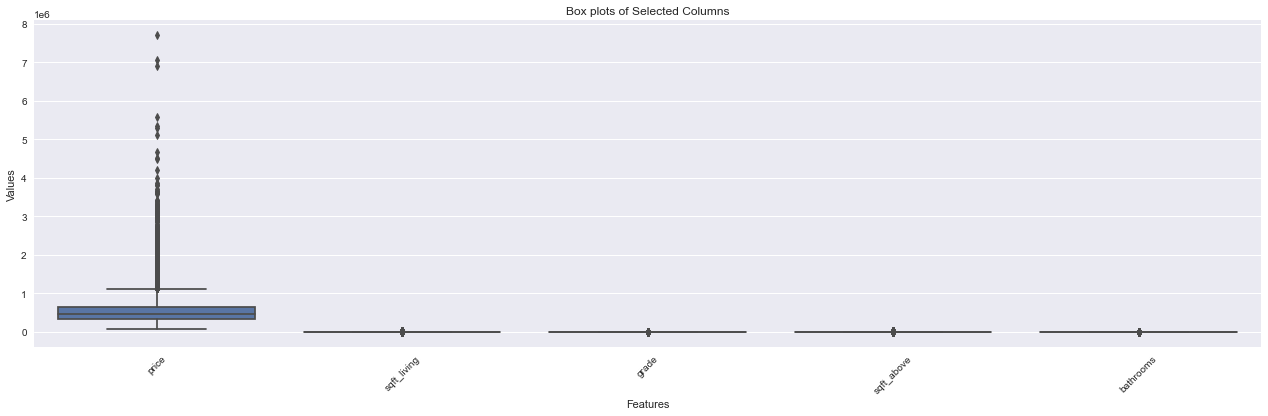

In [20]:
df1 = df[['price', 'sqft_living', 'grade', 'sqft_above', 'bathrooms']]
plt.figure(figsize=(22, 6))
sns.boxplot(data = df1)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

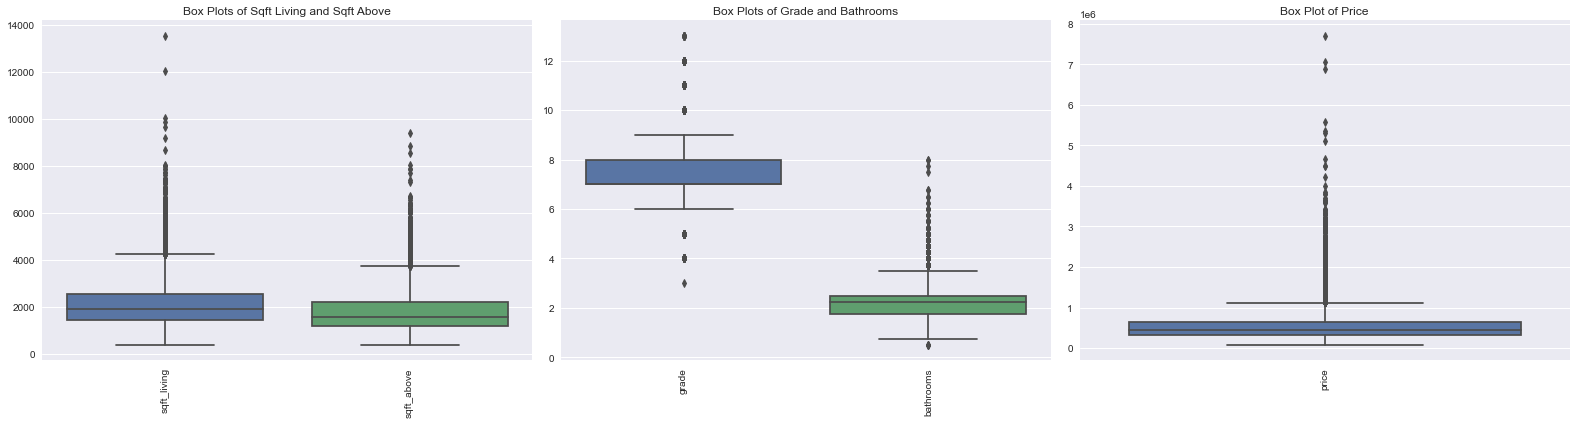

In [21]:
# Define the feature groups
F1= ['sqft_living', 'sqft_above']
F2 = ['grade', 'bathrooms']
F3 = ['price']

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=False)

# Plot for sqft_living and sqft_above
sns.boxplot(data=df[F1], ax=axes[0])
axes[0].set_title('Box Plots of Sqft Living and Sqft Above')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Plot for grade and bathrooms
sns.boxplot(data=df[F2], ax=axes[1])
axes[1].set_title('Box Plots of Grade and Bathrooms')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


# Plot for price
sns.boxplot(data=df[F3], ax=axes[2])
axes[2].set_title('Box Plot of Price')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

# Display the plots
plt.tight_layout()
plt.show()